# Research Skills: Image Analysis 
## Take-home Assignment - Part 2 and 3
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2022-2023

Your First Name:Hamza

Your Last Name: Sajjad

Your Student ID: 2074811

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Part 2: Extracting vessels from raw fundus images

1. (5 points) Load the color image. Using subplots, display each color channel separately.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.

   **Display the image with an appropriate title.**

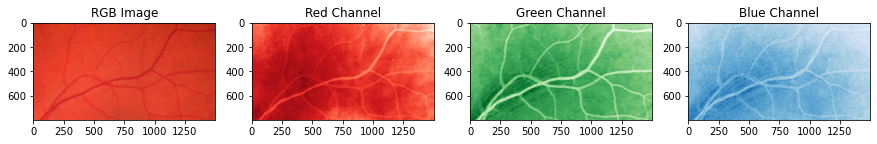

In [239]:
from skimage import io 
import matplotlib.pyplot as plt
im = io.imread('2074811_vesselimage.jpg')
r = im[:, :, 0]
g = im[:, :, 1]
b = im[:, :, 2]
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15, 5))
ax0.imshow(im)
ax0.set_title("RGB Image")
ax1.imshow(r, cmap="Reds")
ax1.set_title("Red Channel")
ax2.imshow(g, cmap="Greens")
ax2.set_title("Green Channel")
ax3.imshow(b, cmap="Blues")
ax3.set_title("Blue Channel")
plt.show()

2. (5 points) Convert the color image to HSV and display the hue, saturation and value channels.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.

   **Report the steps you took briefly to denoise the image as comments in your code.**

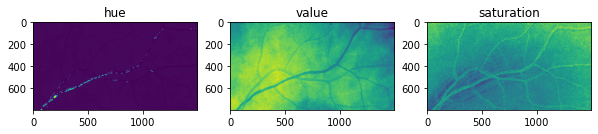

In [240]:
from skimage.color import rgb2hsv
imhsv = rgb2hsv(im)
hue_img = imhsv[:, :, 0]
value_img = imhsv[:, :, 2]
sat_img = imhsv[:, :, 1]
fig = plt.subplots(figsize=(10, 10))
plt.subplot(1,3,1)
plt.title('hue')
plt.imshow(hue_img)
plt.subplot(1,3,2)
plt.title('value')
plt.imshow(value_img)
plt.subplot(1,3,3)
plt.title('saturation')
plt.imshow(sat_img)

3. (20 points) Segment the vessels to obtain a binary image where pixels representing the vessels are set to 1. You should compare two different image segmentation algorithms. You can apply morphological operations on these images.

   Points breakdown: Maximum of 10 points for each method. Comparing two thresholding algorithms only counts for 1 method. Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles. For each method: Full (10) points if each method successfully segments all the large vessels, most of the smaller vessels and none of the background. Show the results for each step you took. If the vessel shapes are slightly distorted or a 10% of the background is segmented or 50% of the smaller vessels are missing, you will get a maximum of 7 points each. If you make an attempt and the results are poor, you can get a maximum of 5 points each.

   **Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles.**

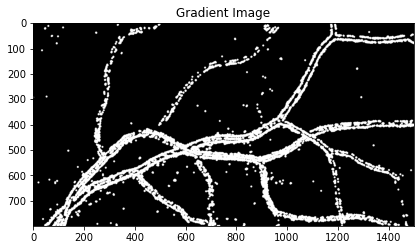

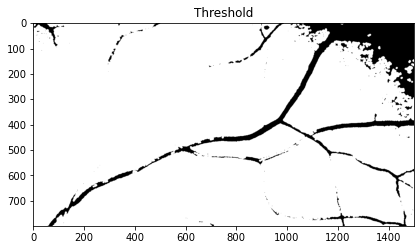

In [241]:
from skimage.morphology import dilation, erosion, disk, opening, closing, reconstruction, extrema, binary_closing
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
import numpy as np

im2 = io.imread('2074811_vesselimage.jpg', as_gray=True)
im2 = im2.astype(float)                
# normarlize the intensity values a range between 0 and 1
im2 = im2-im2.min()                    
im2 = im2/im2.max()
# threshold the image 
imbw = im2 > 0.4

im_op= opening(imbw,disk(4))




#edge detection 
#Dilate the image (im) with a disk structuring element of 2 pixels (disk(2))
im_dilate = dilation(im2, disk(2))

#Erode the image (im) with a disk structuring element of 2 pixels (disk(2))
im_erode = erosion(im2, disk(2))

#Subtract the Eroded Image from the dilated image to get the gradient image
im_gradient = (im_dilate - im_erode)
#converting image to binary
im_op2= opening(im_gradient,disk(4))>0.05

fig = plt.subplots(figsize=(15, 10))
plt.subplot(2,2,1)

plt.imshow(im_op2, cmap='gray')
plt.title('Gradient Image')
plt.show()
fig = plt.subplots(figsize=(15, 10))
plt.subplot(1,2,2)
plt.imshow(im_op, cmap='gray')
plt.title('Threshold')
plt.show()



4. (5 points) Overlay your segmentation solutions with the binary mask (manual annotation results).
   **Display the resulting images with appropriate titles.**

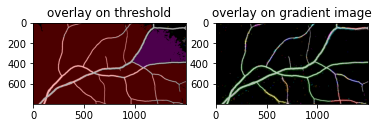

In [242]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

mask=io.imread('2074811_vesselmask.jpg',as_gray=True)
label_img1 = label(im_op)
image_label_overlay1 = label2rgb(label_img1, image=mask, bg_label = 0)

label_img2 = label(im_op2)
image_label_overlay2 = label2rgb(label_img2, image=mask, bg_label = 0)

plt.subplot(2,2,1)
plt.title('overlay on threshold')
plt.imshow(image_label_overlay1)

plt.subplot(2,2,2)
plt.title('overlay on gradient image')
plt.imshow(image_label_overlay2)

5. (5 points) Compute the Dice or Jaccard score between your solution and the binary mask.


In [243]:


mask_binary = mask > 0
print(jaccard_score(im_op2, mask_binary, average='samples'))
print(jaccard_score(im_op, mask_binary, average='samples'))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

0.3615659909468746
0.05958140092897078


## Part 3: Extracting vessels from raw fundus images

1. (2 points) Remove smaller vessels (less than 8 pixels wide) with morphological opening (after you load the image).

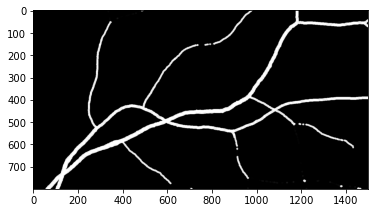

In [244]:

im3 = io.imread('2074811_vesselmask.jpg')

im_open_3 = opening(im3, disk(4))

plt.imshow(im_open_3, cmap='gray')




2. (3 points) Apply morphological thinning to obtain a 1 pixel thin centerline of the vascular network.

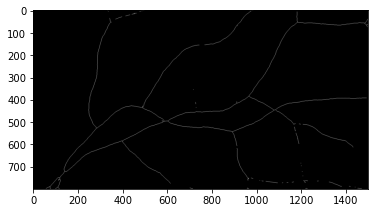

In [245]:
from skimage.morphology import thin
import matplotlib.pyplot as plt
thin1 = thin(im_open_3)
plt.imshow(thin1, cmap='gray')


3. (5 points) Find overall length of the vascular network in the image after thinning.

In [246]:
import numpy as np

length = np.sum(thin1)
length




5570

4. (5 points) Find the length of the vascular network which is wider than 40 pixels. In other words, find the total length of all the vessels which are wider than 40 pixels. Hint: You can apply a medial axis transforms to compute the width of the vessel for the pixels of the skeleton

In [247]:
labels, num_labels = ndi.label(thin1)
l= ndi.sum(thin1, labels, range(1, num_labels+1))
total_length = np.sum(l[l > 40])
total_length

#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.sum.html

62.0

5. (5 points) Computer orientation of the vascular network in the image after thinning. Display the orientation distribution of the vascular network in a polar (rose) plot.

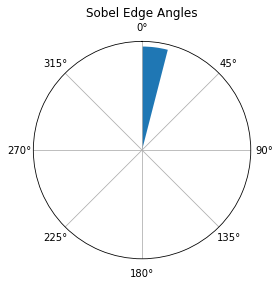

In [248]:
from skimage import feature
from skimage.exposure import histogram 
from skimage import exposure
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h

thin2 = thin1.astype(np.uint8)
thin2 = ndi.gaussian_filter(thin2, 2)

# Prewitt Image Gradient 
edge_prewitt_h = prewitt_h(thin2)
edge_prewitt_v = prewitt_v(thin2)

# Sobel Image Gradient 
edge_sobel_h = sobel_h(thin2)
edge_sobel_v = sobel_v(thin2)

angles = np.arctan2(edge_sobel_v, edge_sobel_h) * 180 / np.pi

# Plot histogram of edge angles
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.hist(angles.ravel(), bins=25, range=(0, 2*np.pi), density=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_yticks([])
ax.set_title('Sobel Edge Angles')
plt.show()




6. (5 points) Compute the length and orientation of each branch (e.g. with the sknw package (https://github.com/Image-Py/sknw)).

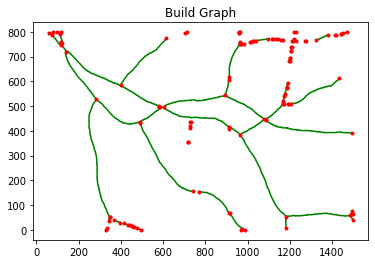

Branch 0: length=23.49, orientation=0.69
Branch 1: length=4.83, orientation=0.69
Branch 2: length=14.07, orientation=0.69
Branch 3: length=7.66, orientation=0.69
Branch 4: length=90.78, orientation=0.69
Branch 5: length=48.49, orientation=0.69
Branch 6: length=7.41, orientation=0.69
Branch 7: length=3.83, orientation=0.69
Branch 8: length=8.83, orientation=0.69
Branch 9: length=22.07, orientation=0.69
Branch 10: length=33.56, orientation=0.69
Branch 11: length=20.49, orientation=0.69
Branch 12: length=24.38, orientation=0.69
Branch 13: length=3.41, orientation=0.69
Branch 14: length=422.40, orientation=0.69
Branch 15: length=313.91, orientation=0.69
Branch 16: length=537.62, orientation=0.69
Branch 17: length=10.49, orientation=0.69
Branch 18: length=6.24, orientation=0.69
Branch 19: length=9.66, orientation=0.69
Branch 20: length=187.72, orientation=0.69
Branch 21: length=3.83, orientation=0.69
Branch 22: length=411.84, orientation=0.69
Branch 23: length=2.00, orientation=0.69
Branch 

In [249]:

from skimage.morphology import skeletonize
from skimage import data
import sknw
ske = skeletonize(thin1).astype(np.uint16)
graph = sknw.build_sknw(ske)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    

nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')


plt.title('Build Graph')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import sknw

lengths = []
orientations = []

# skeletonize the image
ske = skeletonize(thin1).astype(np.uint16)


graph = sknw.build_sknw(ske)


for (s, e) in graph.edges():

    
    length = graph[s][e]['weight']
    dx = ps[-1, 1] - ps[0, 1]
    dy = ps[-1, 0] - ps[0, 0]
    theta = np.arctan2(dy, dx)

    lengths.append(length)
    orientations.append(theta)

for i in range(len(lengths)):
    print(f"Branch {i}: length={lengths[i]:.2f}, orientation={orientations[i]:.2f}")
    
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html
#https://github.com/Image-Py/sknw